In [1]:
# ------------------------------------------------------------
# ---------------- Data Manipulation -------------------------
# ------------------------------------------------------------
import pandas as pd

# ------------------------------------------------------------
# ---------------- Data Visualization ------------------------
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,grid_size,impl,num_threads,iteration,result
0,32,seq,2,1,0.000634
1,32,seq,2,2,0.000600
2,32,seq,2,3,0.000660
3,32,seq,2,4,0.000642
4,32,seq,2,5,0.000646


In [4]:
grouped_df = df.groupby(['grid_size', 'num_threads', 'impl'])['result']
print(grouped_df.mean())

grid_size  num_threads  impl
32         2            omp      0.000453
                        pth      0.005212
                        seq      0.001019
           8            omp      0.000343
                        pth      0.006993
                        seq      0.001759
           32           omp      0.003497
                        pth      0.025770
                        seq      0.001734
512        2            omp      0.090097
                        pth      0.092461
                        seq      0.171344
           8            omp      0.043869
                        pth      0.049531
                        seq      0.165662
           32           omp      0.039315
                        pth      0.045839
                        seq      0.170443
4096       2            omp      5.538843
                        pth      5.606724
                        seq     10.721379
           8            omp      2.708416
                        pth      2.744477
     

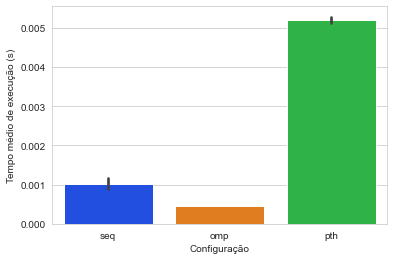

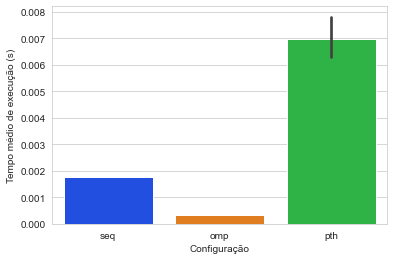

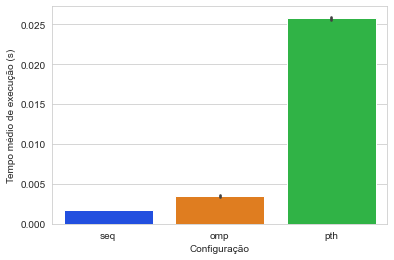

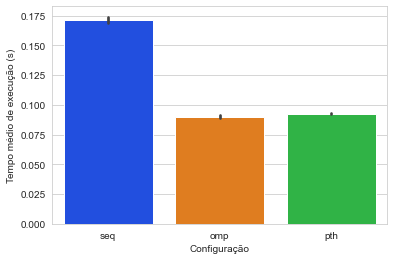

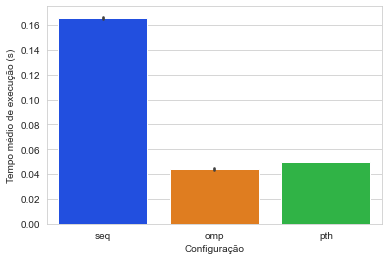

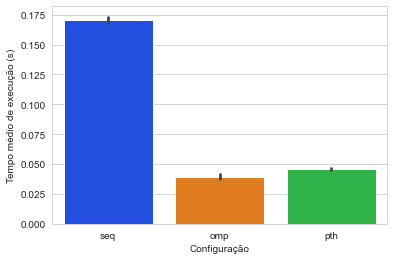

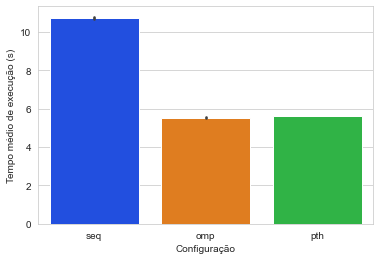

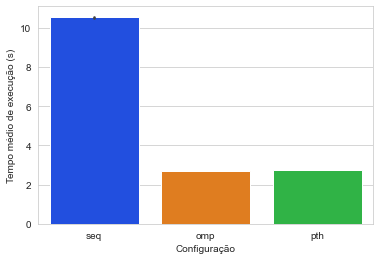

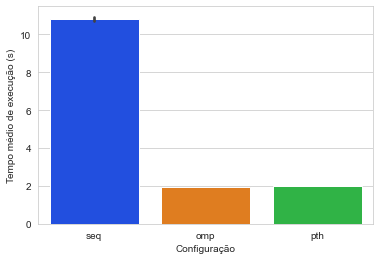

In [5]:
colors = sns.color_palette("bright", 5)
for grid_size in [32, 512, 4096]:
    for num_threads in [2, 8, 32]:
        filtered_df = df.loc[(df['grid_size'] == grid_size) & (df['num_threads'] == num_threads)]
        sns.set_style('whitegrid')

        sns.barplot(x='impl', y='result', 
            order=['seq', 'omp', 'pth'], palette=colors, data=filtered_df)

        plt.xlabel('Configuração')
        plt.ylabel('Tempo médio de execução (s)')
        
        plt.savefig(str(grid_size) + '_' + str(num_threads))
        plt.show()